In [ ]:
#importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import sys
import numpy as np
import pandas as pd

#importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : , 3].values

#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[ : , 1:3])
X[ : , 1:3] = imputer.transform(X[ : , 1:3])

#Encoding categorical data
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
ct = ColumnTransformer(
    [("Country", OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

#Creating a dummy variable
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(transformer.fit_transform(X))
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

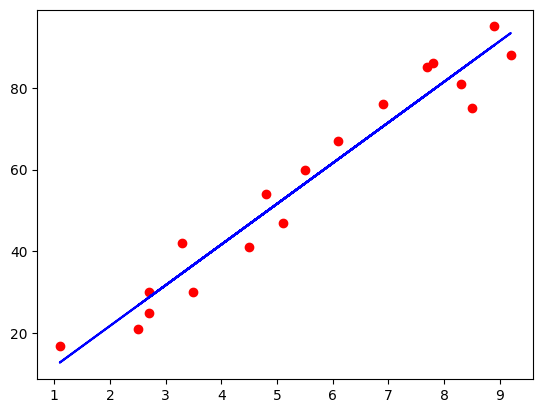

In [4]:
#Data Preprocessing Template

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting graphs

#importing the dataset
dataset = pd.read_csv('studentscores.csv')
X = dataset.iloc[ : , : 1 ].values
Y = dataset.iloc[ : , 1 ].values

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

#Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = regressor.predict(X_test)

#Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

#visualising the test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')







